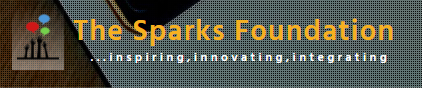

## A GRIPNOV2021 Task#1 submission by Supriya Raturi

## Topic : Prediction using Supervised ML

**Problem Statement:**
To predict the percentage of a student based on number of study hours. What will be predicted score if a student studies for 9.25 hrs/day?


In this problem,we have to predict the scores based on study hours. Hence this is a regression problem and we will perfrom **Linear Regression** on this data.

In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [6]:
# Read the csv file
df1 = pd.read_csv('http://bit.ly/w-data')
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Shape of the data
df1.shape

(25, 2)

In [8]:
# Informational summary
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Observation:**
1. Both features are numeric types
2. None of the features contains null values.

In [17]:
# Descriptive Summary
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


**Observation:**
1. Minimum and Maximum amount of hours a student spend while studying is 1.1hr and 9.2hrs respectively with mean hours being 5.
2. Scores of students range between 17 and 95 with median score of 47.
3. Mean and Median of both Hours and Scores are almost simmilar; data is moderately linear.

## Exploratory data analysis

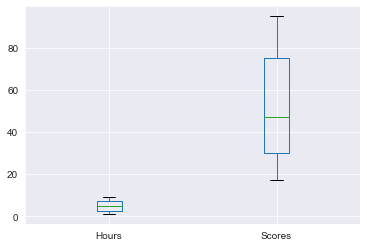

In [20]:
# Checking for outliers
df1.boxplot();

**Inference:**
1. Neither of the feature contains outliers.    

**Undersatnding the realtionship b/w two features:**

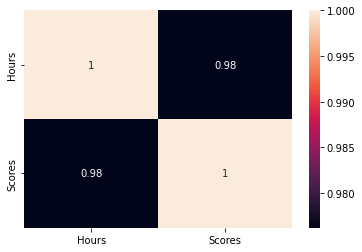

In [9]:
# Visualization using Heatmap
sns.heatmap(df1.corr(),annot=True);

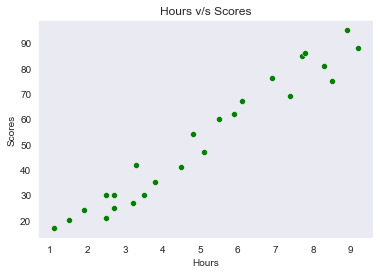

In [15]:
# Visualization using Scatter plot
sns.set_style('dark')
plt.title('Hours v/s Scores')
sns.scatterplot(data=df1,x='Hours',y='Scores',color='green');

**Inference:**
1. Hours and Scores are highly positively related.
2. As the number of study hours increases, scores of student also increases.

## Model Building

**5 assumption of Linear Regression**
1. Dependent and Independent terms must have a Linear relationship.
2. Error terms must be Normally distributed.
3. Independent variables should not be correlated;No Multicollinearity.
4. Error terms should not be correlated;No Autocorrelation.
5. Error terms must have constant variance;No heteroskedasticity.

In [31]:
# Test Train split
from sklearn.model_selection import train_test_split

X = df1.Hours
xc = sm.add_constant(X)
y = df1.Scores

X_train,X_test,y_train,y_test = train_test_split(xc,y,test_size=0.3,random_state=1)

In [34]:
ols_model = sm.OLS(y,xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           9.13e-17
Time:                        00:21:09   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Checking for Assumption:1 -- Dependent and Independent terms must have a Linear relationship.

# Rainbow Test
import scipy.stats as stats
fstats,pvalue = sm.stats.diagnostic.linear_rainbow(ols_model)

print('Test Stats: ',fstats)
print('Pvalue: ',pvalue)
print()

if pvalue > 0.05:
    print('Data is Linear')
else:
    print('Data is not linear')

Test Stats:  2.122962100893772
Pvalue:  0.11910586650135217

Data is Linear


In [44]:
# Checking for Assumption:2 -- Error terms must be Normally distributed

fstats,pvalue = stats.shapiro(ols_model.resid)

print('Test Stats: ',fstats)
print('Pvalue: ',pvalue)
print()

if pvalue > 0.05:
    print('Error term is normally distributed')
else:
    print('Error term is not normally distributed')

Test Stats:  0.904010534286499
Pvalue:  0.02245512418448925

Error term is not normally distributed


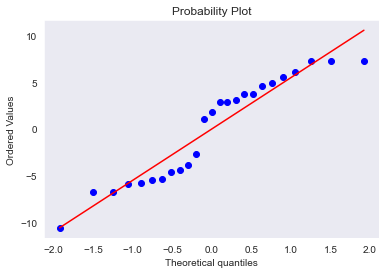

In [41]:
# Visualization on error terms
stats.probplot(ols_model.resid,plot=plt);

In [46]:
# Checking for Assumption:3 -- No Multicollinearity

cnd = ols_model.condition_number
print('Condition Number: ',cnd)

if cnd > 100:
    print('Multicolinearity exist')
else:
    print('Multicolinearity does not exist')

Condition Number:  12.954414647491667
Multicolinearity does not exist


In [ ]:
# Checking for Assumption:4 -- No Autocorrelation

# From summary we can see the Durbin-Watson score is 1.46 indicating slight positive autocorelation.
# We know,
#          0-2 : positive autocorrelation
#          2   : no autocorrelationn
#          2-4 : negative autocorrelation

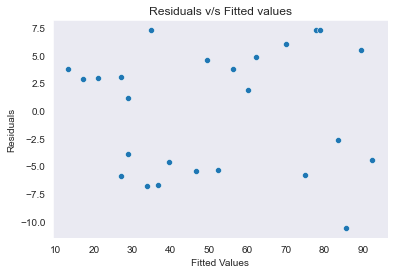

In [50]:
# Checking for Assumption:5 -- No heteroskedasticity.

plt.title('Residuals v/s Fitted values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
sns.scatterplot(ols_model.fittedvalues,ols_model.resid);

# Since no funnel shape is visible hence heteroskedasticity does not exist.

### Building SKLEAR Linear regression Model

In [66]:
X = df1.Hours.array.reshape(-1, 1)
y = df1.Scores

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model_lr = lr.fit(X_train,y_train)
print('Trainning Complete')

Trainning Complete


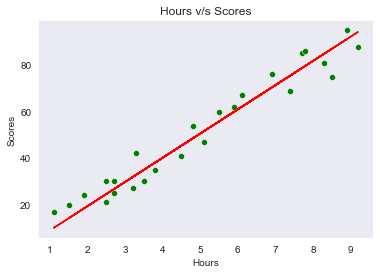

In [75]:
line = model_lr.coef_*X + model_lr.intercept_

plt.title('Hours v/s Scores')
sns.scatterplot(data=df1,x='Hours',y='Scores',color='green');
plt.plot(df1['Hours'],line,color='red')

In [70]:
df_comp = pd.DataFrame()
df_comp['Actual'] = y_test
df_comp['Predicted'] = model_lr.predict(X_test)

df_comp

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


### Evaluating the model

In [77]:
mse = mean_absolute_error(df_comp['Actual'],df_comp['Predicted'])
rmse = np.sqrt(mse)

print('Test Mean Square Error: ',mse)
print('Test Root Mean Square Error: ',rmse)

Test Mean Square Error:  7.169048271425507
Test Root Mean Square Error:  2.677507847126784


### Predicting a score by a user defined value of Hours.

In [83]:
sc = float(input('Enter number of Hours a student studied: '))
predict = model_lr.predict([[sc]])
print('Student will score: ',predict)

Enter number of Hours a student studied: 9.25
Student will score:  [94.78722213]


**Result:**
If a student studies for 9.25hrs/day then he/she/they will score 94.78% marks.    